In [1]:
from numpy import argmax
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress
    
def count(pred, true, min, max, endpoint):

    if(endpoint == "human_fup"):
        lst = [abs(a/b) for a, b in zip(pred, true)]
        #print(lst)

        newlist = [x for x in lst if min <= x <= max]
        #print(newlist)

        return (len(newlist)/len(lst)) *100
    
    else:
        lst = [abs(10**a/10**b) for a, b in zip(pred, true)]
        #print(lst)

        newlist = [x for x in lst if min <= x <= max]
        #print(newlist)

        return (len(newlist)/len(lst)) *100
    
    return

def calc_gmfe(pred, true, endpoint):
    
    if(endpoint == "human_fup"):
        
        lst = [abs(np.log10(a/b)) for a, b in zip(pred, true)]
        mean_abs= np.mean(lst)
        return (10**mean_abs)
    
    else: 
        lst = [abs(np.log10(10**a/10**b)) for a, b in zip(pred, true)]
        mean_abs= np.mean(lst)
        
        return (10** mean_abs)
    
    return
                         
def median_fold_change_error(pred, true, endpoint):
                         
    if (endpoint == "human_fup"):
        lst = [abs(np.log10(a/b)) for a, b in zip(pred, true)]
        median_abs= np.median(lst) 
        return (np.e**median_abs)
    
    else:
        lst = [abs(np.log10(10**a/10**b)) for a, b in zip(pred, true)]
        median_abs= np.median(lst) 
        return (np.e**median_abs)
    
    return
                          
def calc_bias(pred, true, endpoint):
                          
    if (endpoint == "human_fup"):
        lst = [(a - b) for a, b in zip(pred, true)]                 
        bias= np.median(lst)
        return bias
    
    else:
        lst = [(10**a - 10**b) for a, b in zip(pred, true)]                 
        bias= np.median(lst)
        return bias
    
    return

In [5]:
df = pd.read_csv("detail_list_Prediction_human_from_mordred_morgan_fs_animal_artificial.csv")
df

,endpoint,random_state,split,smiles_r,pred,true,key
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...
...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...


In [6]:
df["residual"] = df["pred"] - df["true"]
df

,endpoint,random_state,split,smiles_r,pred,true,key,residual
0,human_VDss_L_kg,42,0,C#C[C@]1(O)CC[C@H]2[C@@H]3CCc4cc([O-])ccc4[C@H...,0.278796,0.633468,human_VDss_L_kgC#C[C@]1(O)CC[C@H]2[C@@H]3CCc4c...,-0.354672
1,human_VDss_L_kg,42,0,C=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N)nc(N)c3n2)cc1)...,-0.048287,-0.154902,human_VDss_L_kgC=C(CC(NC(=O)c1ccc(CCc2cnc3nc(N...,0.106615
2,human_VDss_L_kg,42,0,C=CC1=C(C(=O)[O-])[NH+]2C(=O)C(=NC(=O)C(NOCC(=...,-0.712607,-0.619789,human_VDss_L_kgC=CC1=C(C(=O)[O-])[NH+]2C(=O)C(...,-0.092818
3,human_VDss_L_kg,42,0,C=CCc1ccccc1OCC(O)C[NH2+]C(C)C,0.366459,0.505150,human_VDss_L_kgC=CCc1ccccc1OCC(O)C[NH2+]C(C)C420,-0.138691
4,human_VDss_L_kg,42,0,C=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H](Oc2ncc(OC)c3c...,0.033923,0.442480,human_VDss_L_kgC=C[C@@H]1C[C@]1(NC(=O)C1C[C@@H...,-0.408557
...,...,...,...,...,...,...,...,...
29580,human_thalf,46,4,[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-])c(Br)c1)NC...,0.934596,0.397940,human_thalf[NH3+]CCCCC(NC(=O)C(Cc1cc(Br)c([O-]...,0.536656
29581,human_thalf,46,4,[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21,0.549054,1.064458,human_thalf[NH3+]C[C@H]1OB(O)c2c(OCCCO)cccc21464,-0.515404
29582,human_thalf,46,4,[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1,0.578109,-0.173925,human_thalf[O-]c1ccc(C2=Cc3ccc([O-])cc3OC2)cc1464,0.752034
29583,human_thalf,46,4,[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-])c([O-])c3...,0.631691,0.000000,human_thalf[O-]c1ccc([C@H]2C[NH2+]CCc3c2cc([O-...,0.631691


human_VDss_L_kg
1249
2-fold :  57.56605284227382
3-fold :  75.5004003202562
5-fold :  89.51160928742993
gmfe :  2.1132991506860748
mfe :  1.278202013052475
bias :  0.03379882045758223
rmse  0.4331120985953029
r2  0.5418160026386168


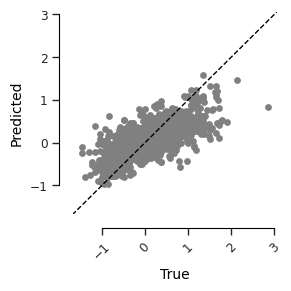

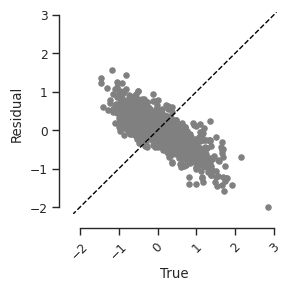

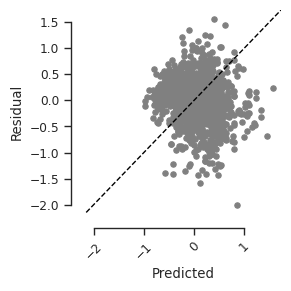

human_CL_mL_min_kg
1281
2-fold :  51.60031225604996
3-fold :  70.2576112412178
5-fold :  85.08977361436378
gmfe :  2.4615476854056606
mfe :  1.3365103242440703
bias :  -0.2943029036620173
rmse  0.5382458108109652
r2  0.31183279810859177


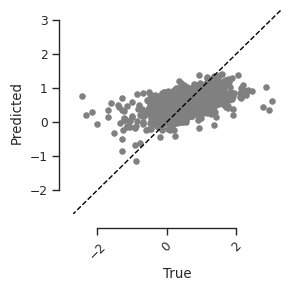

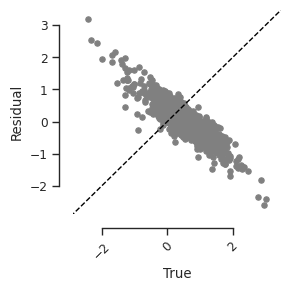

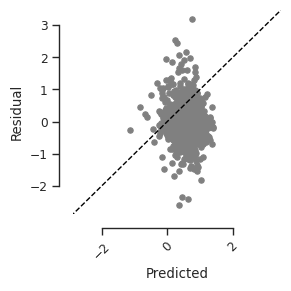

human_fup
879
2-fold :  55.51763367463026
3-fold :  67.91808873720136
5-fold :  78.2707622298066
gmfe :  2.7422357201325513
mfe :  1.2746508825060685
bias :  0.04131857834622282
rmse  0.20836564571414942
r2  0.6261198372477654


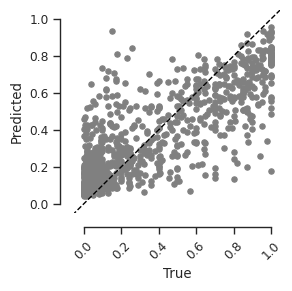

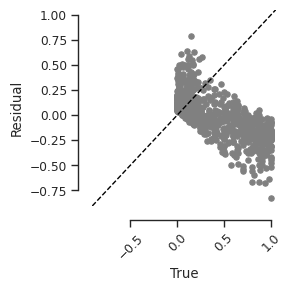

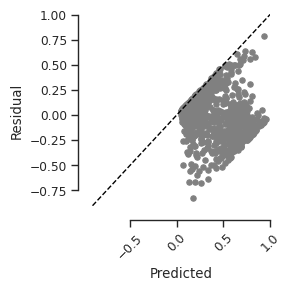

human_mrt
1243
2-fold :  49.879324215607404
3-fold :  70.87691069991955
5-fold :  84.070796460177
gmfe :  2.480043066645149
mfe :  1.3513231447286074
bias :  0.06959051149271023
rmse  0.5397099164814277
r2  0.29273613561227985


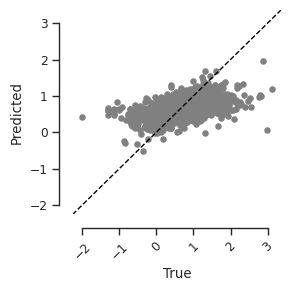

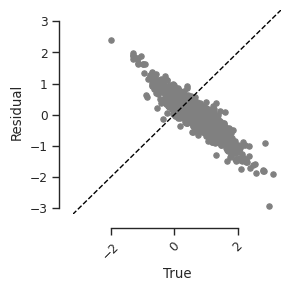

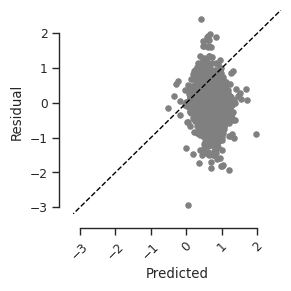

human_thalf
1265
2-fold :  51.067193675889335
3-fold :  72.49011857707511
5-fold :  86.08695652173914
gmfe :  2.413636566329357
mfe :  1.339301322597261
bias :  0.24510702730825895
rmse  0.5149333962464673
r2  0.3169609493545552


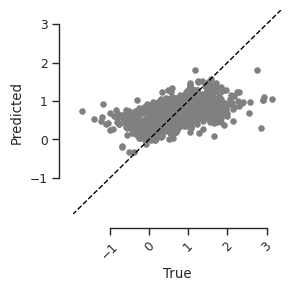

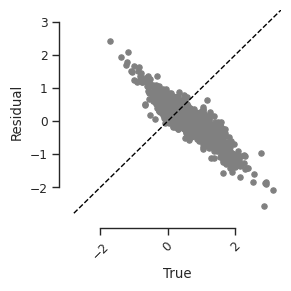

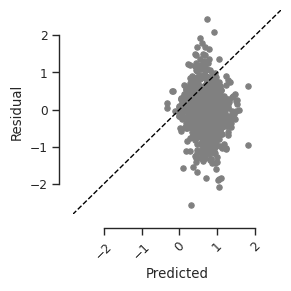

In [7]:
for endpoint in ["human_VDss_L_kg","human_CL_mL_min_kg", "human_fup", "human_mrt", "human_thalf"]:
    print(endpoint)
    
    Y_test = df[df["endpoint"]==endpoint].groupby("smiles_r").mean()["true"].values
    y_pred = df[df["endpoint"]==endpoint].groupby("smiles_r").mean()["pred"].values
    y_res = df[df["endpoint"]==endpoint].groupby("smiles_r").mean()["residual"].values
    print(len(y_pred))

    fold_2= count(y_pred, Y_test, 0.5, 2, endpoint)
    fold_3= count(y_pred, Y_test, 1/3, 3, endpoint)
    fold_5= count(y_pred, Y_test, 1/5, 5, endpoint)
    gmfe = calc_gmfe(y_pred, Y_test, endpoint)
    mfe = median_fold_change_error(y_pred, Y_test, endpoint)
    bias = calc_bias(y_pred, Y_test, endpoint)

    print("2-fold : ", fold_2)
    print("3-fold : ", fold_3)
    print("5-fold : ", fold_5)
    print("gmfe : ", gmfe)
    print("mfe : ", mfe)
    print("bias : ", bias)

    rmse = sqrt(mean_squared_error(Y_test, y_pred))
    print('rmse ',rmse)
    r2 = r2_score(Y_test, y_pred)
    print('r2 ',r2)
    
    fig = plt.figure(figsize =(3, 3), dpi=100) 

    plt.scatter(Y_test,  y_pred, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
    
    
    fig = plt.figure(figsize =(3, 3), dpi=100) 

    plt.scatter(Y_test,  y_res, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("True")
    plt.ylabel("Residual")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
    fig = plt.figure(figsize =(3, 3), dpi=100) 

    plt.scatter(y_pred,  y_res, color = 'gray', s=15) # s controls point size
    xleft, xright = plt.xlim()
    ybottom, ytop = plt.ylim()

    plt.xlim(min(xleft,ybottom) ,max(xright,ytop))
    plt.ylim(min(xleft,ybottom),max(xright,ytop))

    #add y=x line
    plt.plot([min(xleft,ybottom)-2,max(xright,ytop)],[min(xleft,ybottom)-2,max(xright,ytop)], lw=1, color='black', linestyle='dashed')

    sns.set_context("paper", font_scale=1)
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.title("")

    sns.set_style('ticks')
    sns.despine(offset=10, trim=True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()